In [5]:
import matplotlib.pyplot as plt
from src.mylib.pgm import crop_pgm_image
import numpy as np
from ipywidgets import interact

In [6]:
file_path = 'gray8bit_Dataset/'
file_list = ['nightshot_iso_100.pgm',
             'leaves_iso_1600.pgm', 
             'leaves_iso_200.pgm',
             'zone_plate.pgm']

In [7]:
img_dict = {}
for file_name in file_list:
    with open(file_path + file_name, 'rb') as pgmf:
        im = plt.imread(pgmf)
        img_dict[file_name] = crop_pgm_image(im)

In [8]:
img_dict.keys()

dict_keys(['nightshot_iso_100.pgm', 'leaves_iso_1600.pgm', 'leaves_iso_200.pgm', 'zone_plate.pgm'])

### SVD

In [5]:
from numpy.linalg import svd

In [6]:
def compress_svd(img, k=0):
    U, s, V = svd(img, full_matrices=False)
    reconst_matrix = np.dot(U[:,:k], np.dot(np.diag(s[:k]), V[:k,:]))
    return reconst_matrix, s

def loss(original, reconst):
    n, m = original.shape
    return np.sum((reconst - original)**2) / (n * m)

def compress_show_images(img_name: str):
    img = img_dict[img_name]
    original_shape = img.shape
    U, s, V = svd(img, full_matrices=False)
    exp_k = np.arange(5, int(len(s)/2), 5)
    compress_ratio = []
    loss_list = []
    for k in exp_k:
        reconst_img, s = compress_svd(img, k)
        compress_ratio.append(100*k*(original_shape[0]+original_shape[1]+1)/(original_shape[0]*original_shape[1]))
        loss_list.append(loss(img, reconst_img))
    return compress_ratio, loss_list                    
                     
        
        

In [7]:
def compr_image_plot(img_name, k):
    img = img_dict[img_name]
    reconst_matrix, s = compress_svd(img, k)
    fig = plt.figure(figsize=(32, 10))
    ax = fig.add_subplot(121)
    plt.imshow(reconst_matrix)

In [8]:
def loss_compress_plot(img_name):
    img = img_dict[img_name]
    compress_ratio, loss_list = compress_show_images(img_name)
    fig = plt.figure(figsize=(26, 8))
    ax = fig.add_subplot(121)
    ax.minorticks_on()
    ax.grid(which='major',
            color = 'k', 
            linewidth = 0.5)
    ax.grid(which='minor', 
            color = 'k', 
            linestyle = ':')
    plt.plot(compress_ratio, loss_list, c='green', label='SVD')
    plt.ylabel('Loss')
    plt.xlabel('Compress ratio, %')
    plt.legend(loc='best')
    plt.title(f'{img_name}', loc='center')
    plt.show()

In [9]:
interact(loss_compress_plot, img_name=list(img_dict.keys()))

interactive(children=(Dropdown(description='img_name', options=('nightshot_iso_100.pgm', 'leaves_iso_1600.pgm'…

<function __main__.loss_compress_plot(img_name)>

In [10]:
interact(compr_image_plot, img_name=list(img_dict.keys()), k=(2, 400, 1))

interactive(children=(Dropdown(description='img_name', options=('nightshot_iso_100.pgm', 'leaves_iso_1600.pgm'…

<function __main__.compr_image_plot(img_name, k)>

In [15]:
comps = []
losses = []
for img_name in file_list: 
    compress_ratio, loss_list = compress_show_images(img_name)
    comps.append(compress_ratio)
    losses.append(loss_list)

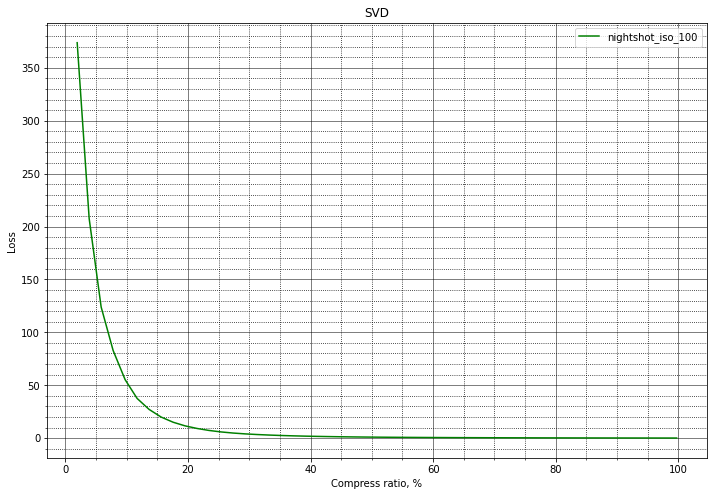

In [17]:
fig = plt.figure(figsize=(26, 8))
ax = fig.add_subplot(121)
ax.minorticks_on()
ax.grid(which='major',
         color = 'k', 
         linewidth = 0.5)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.plot(comps[0], losses[0], c='green', label='nightshot_iso_100')
#plt.plot(comps[1], losses[1], c='blue', label='leaves_iso_1600')
#plt.plot(comps[2], losses[2], c='red', label='leaves_iso_200')
#plt.plot(comps[3], losses[3], c='yellow', label='zone_plate')
plt.ylabel('Loss')
plt.xlabel('Compress ratio, %')
plt.legend(loc='best')
plt.title('SVD', loc='center')
plt.show()
    